### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
female_data=pd.read_csv('female_complete.csv')

In [3]:
female_data['Medal'] = female_data['Medal'].fillna('NA')

In [4]:
male_data=pd.read_csv('male_gdp.csv')
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [5]:
female_swim = female_data[female_data['Sport'] == 'Basketball']

In [6]:
female_swim['Sport'].describe

<bound method NDFrame.describe of 3859    Basketball
3860    Basketball
3861    Basketball
3862    Basketball
3863    Basketball
           ...    
4565    Basketball
4566    Basketball
4567    Basketball
4568    Basketball
4569    Basketball
Name: Sport, Length: 711, dtype: object>

In [7]:
female_swim['Medal'].describe

<bound method NDFrame.describe of 3859        NA
3860        NA
3861    Bronze
3862        NA
3863        NA
         ...  
4565        NA
4566        NA
4567        NA
4568        NA
4569        NA
Name: Medal, Length: 711, dtype: object>

In [8]:
female_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 3859 to 4569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      711 non-null    int64  
 1   Unnamed: 0_x    711 non-null    int64  
 2   ID              711 non-null    int64  
 3   Name            711 non-null    object 
 4   Sex             711 non-null    object 
 5   Age             711 non-null    float64
 6   Height          711 non-null    float64
 7   Weight          711 non-null    float64
 8   NOC             711 non-null    object 
 9   Games           711 non-null    object 
 10  Year            711 non-null    int64  
 11  Season          711 non-null    object 
 12  City            711 non-null    object 
 13  Sport           711 non-null    object 
 14  Event           711 non-null    object 
 15  Medal           711 non-null    object 
 16  Team            711 non-null    object 
 17  Unnamed: 0_y    711 non-null   

In [9]:
# Extract Response and Predictors
y = pd.DataFrame(female_swim["Medal"]).astype('category')
X = pd.DataFrame(female_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [10]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (533, 1) (533, 6)
Test Set  : (178, 1) (178, 6)


In [11]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [12]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
4252,33.0,68.0,181.0,1.720000e+11,3.825863e+07,4495.717816,NA
4276,26.0,77.0,186.0,1.370000e+12,6.091250e+07,22491.279212,NA
4179,20.0,68.0,181.0,1.000000e+12,4.905000e+07,20387.359837,NA
4239,28.0,67.0,180.0,4.740722e+10,9.507120e+06,4986.496177,NA
4538,22.0,80.0,188.0,1.720000e+11,3.825863e+07,4495.717816,NA
...,...,...,...,...,...,...,...
4092,25.0,63.0,162.0,4.150000e+11,1.915300e+07,21667.623871,Silver
4418,36.0,74.0,190.0,6.550000e+11,1.752876e+08,3736.716394,Bronze
4357,22.0,84.0,189.0,4.740722e+10,9.507120e+06,4986.496177,NA
4420,21.0,72.0,175.0,1.960000e+12,1.296075e+09,1512.258164,NA


In [13]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        532
Bronze     60
Silver     60
Gold       59
Name: Medal, dtype: int64


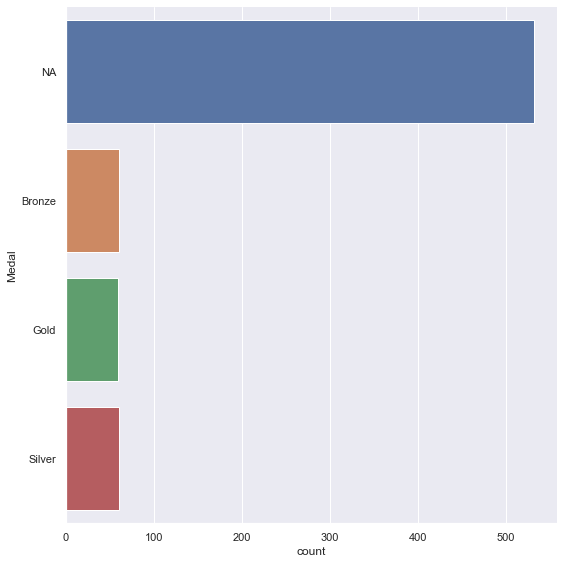

In [14]:
# Medal Types in the Dataset
print("Number of Medal Types :", len(female_swim["Medal"].unique()))

print(female_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = female_swim, kind = "count", height = 8)

In [15]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(533, 6) (533, 1)


In [16]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(1600, 6) (1600, 1)


In [17]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,33.000000,68.000000,181.000000,1.720000e+11,38258629.0,4495.717816,NA
1,26.000000,77.000000,186.000000,1.370000e+12,60912498.0,22491.279212,NA
2,20.000000,68.000000,181.000000,1.000000e+12,49050000.0,20387.359837,NA
3,28.000000,67.000000,180.000000,4.740722e+10,9507120.0,4986.496177,NA
4,22.000000,80.000000,188.000000,1.720000e+11,38258629.0,4495.717816,NA
...,...,...,...,...,...,...,...
1595,32.864827,63.094621,162.148690,1.060000e+12,21249200.0,49884.230936,Silver
1596,26.886910,65.810997,178.113090,1.240000e+12,46443959.0,26698.843654,Silver
1597,35.930846,67.585073,185.824374,6.130000e+11,20127400.0,30455.995310,Silver
1598,26.906332,82.843887,192.614629,1.240000e+12,46443959.0,26698.843654,Silver


In [18]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
4526,23.0,64.0,175.0,2.660000e+12,6.370030e+07,41758.045096
4299,32.0,75.0,185.0,1.530000e+12,3.628642e+07,42164.528470
4120,30.0,69.0,180.0,8.740000e+11,7.456987e+07,11720.551949
4208,30.0,62.0,167.0,4.150000e+11,1.915300e+07,21667.623871
4475,29.0,70.0,175.0,1.820000e+12,3.475054e+07,52373.279326
...,...,...,...,...,...,...
4458,24.0,77.0,196.0,3.559602e+10,2.177322e+06,16348.531207
4025,23.0,65.0,170.0,3.559602e+10,2.177322e+06,16348.531207
3910,21.0,73.0,180.0,4.600000e+12,1.324655e+09,3472.602300
4258,25.0,79.0,185.0,1.150000e+11,2.509615e+07,4582.376181


Number of Medal Types : 4
Bronze    400
Gold      400
NA        400
Silver    400
Name: Medal, dtype: int64


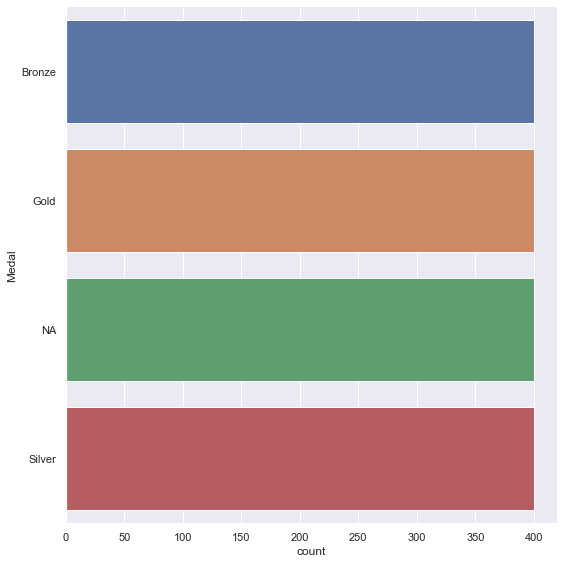

In [19]:
# Medal Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (1200, 1) (1200, 6)
Test Set  : (400, 1) (400, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9966666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9975



<AxesSubplot:>

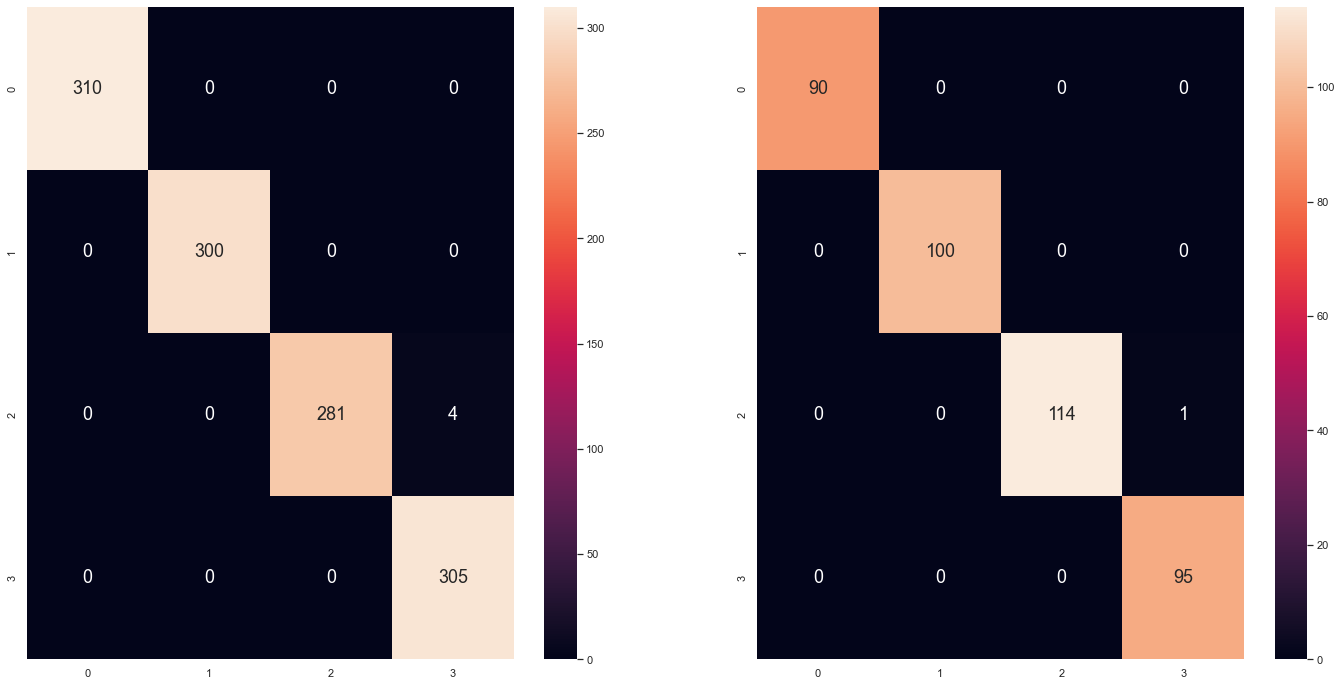

In [20]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 8)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

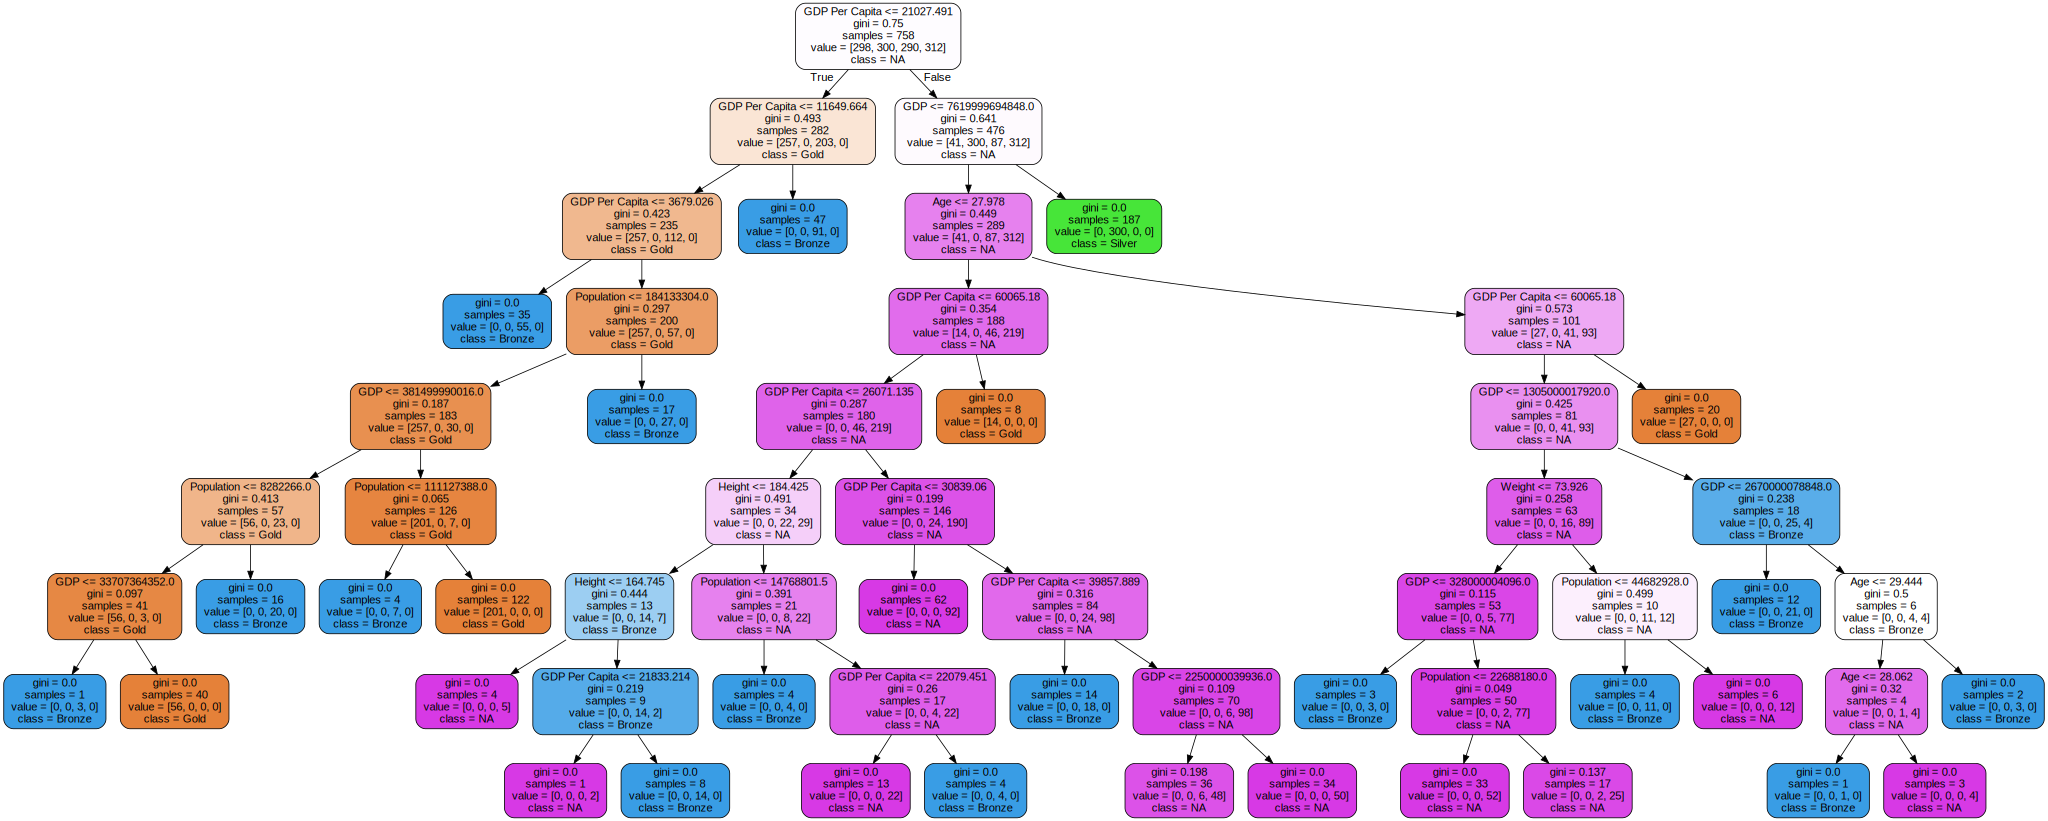

In [21]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [22]:
graph.render("Tree_female_BASKETBALL")

'Tree_female_BASKETBALL.pdf'

### Predictions

In [23]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.9719101123595506


<AxesSubplot:>

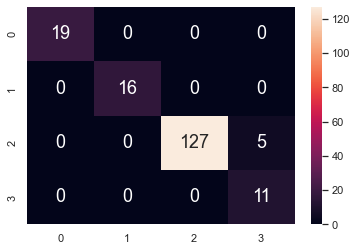

In [24]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})